<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Interpolation and extrapolation</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;"></p>
</div>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import interpolate

In [35]:
def brownianNoise(N):
    return np.cumsum(np.random.randn(N))

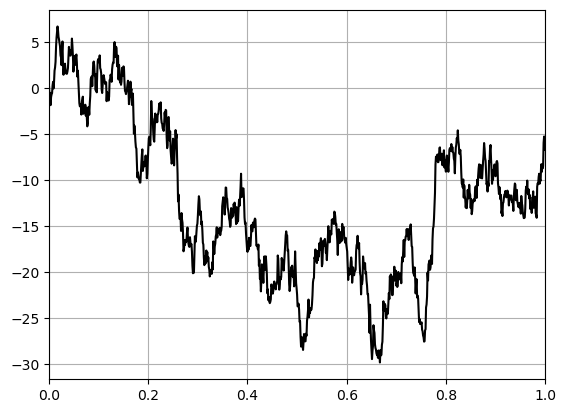

In [36]:
N = 1_001
x = np.linspace(0, 1, N)
y = brownianNoise(N)

plt.plot(x, y, 'k')
plt.xlim([x[0], x[-1]])
plt.grid()
plt.show()

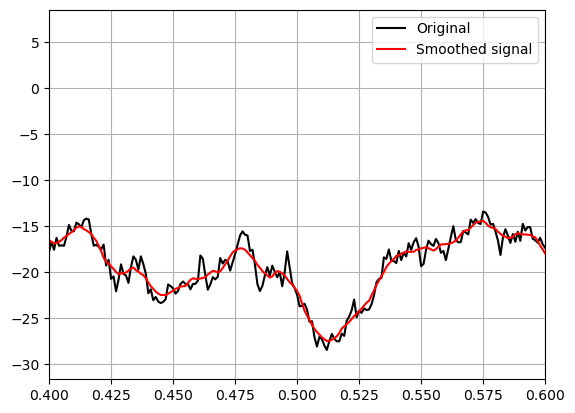

In [37]:
# apply a mean-smoothing filter

k = 11
y_ = np.convolve(y,np.ones(k)/k, mode='same')

plt.plot(x, y, 'k', label="Original")
plt.plot(x, y_, 'r', label='Smoothed signal')
plt.xlim([.4, .6])
plt.legend()
plt.grid()
plt.show()

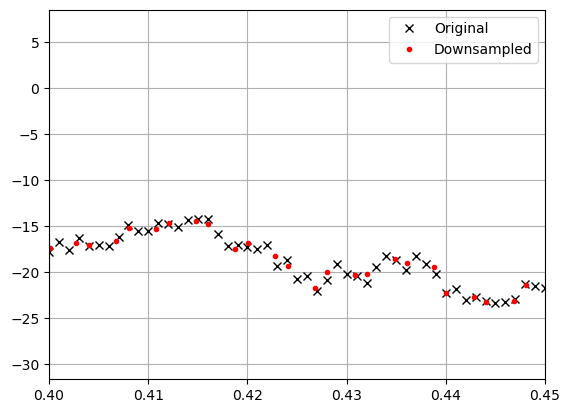

In [38]:
y_downSampled = signal.resample(y, N//2)
x_downSampled = signal.resample(x, N//2)

plt.plot(x, y, 'kx', label='Original')
plt.plot(x_downSampled, y_downSampled, 'r.', label='Downsampled')
plt.xlim([.4, .45])
plt.legend()
plt.grid()
plt.show()

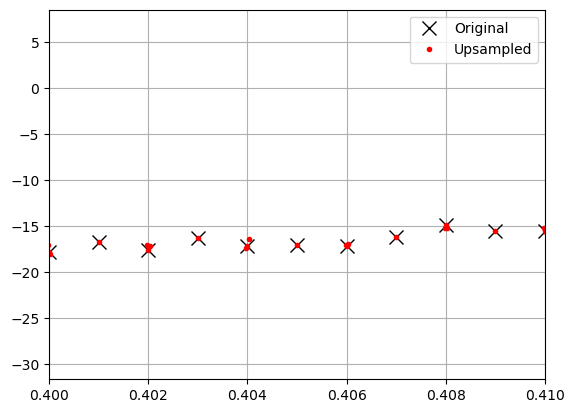

In [39]:
y_upSampled = signal.resample(y, 2*N)
x_upSampled = signal.resample(x, 2*N)

plt.plot(x, y, 'kx', markersize=10, label="Original")
plt.plot(x_upSampled, y_upSampled, 'r.', label="Upsampled")
plt.xlim([.40, .410])
plt.legend()
plt.grid()
plt.show()

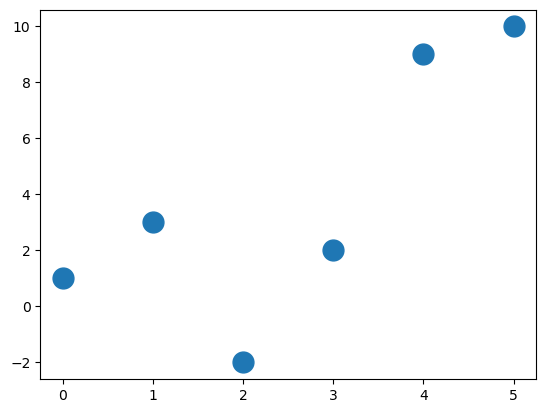

In [40]:
signal = np.array([1, 3, -2, 2, 9, 10])
plt.plot(signal, 'o', markersize=15)
plt.show()

In [41]:
interpolationFactor = 2
interpolationPoints = np.linspace(0, len(signal) - 1, len(signal)*interpolationFactor)
originalPoints = np.arange(len(signal))

interpolatedSignal = np.interp(interpolationPoints, originalPoints, signal) # new X, original X, original Y, output is new Y

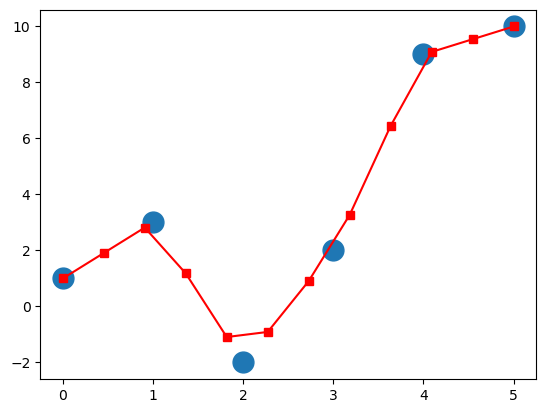

In [42]:
plt.plot(signal, 'o', markersize=15)
plt.plot(interpolationPoints, interpolatedSignal, 'rs-')
plt.show()

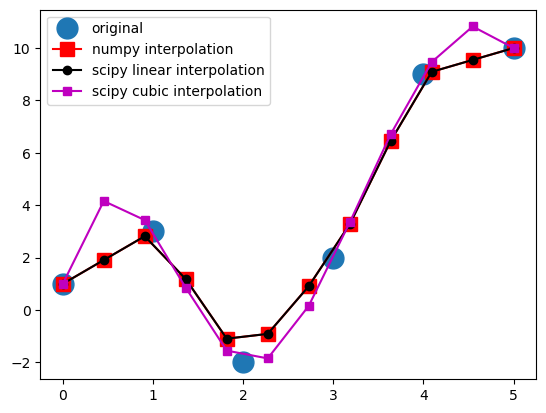

In [43]:
# using scipy

interpolationFunctionLinear = interpolate.interp1d(originalPoints, signal, kind='linear')
interpolatedSignalLinear = interpolationFunctionLinear(interpolationPoints)

interpolationFunctionCubic = interpolate.interp1d(originalPoints, signal, kind='cubic')
interpolatedSignalCubic = interpolationFunctionCubic(interpolationPoints)

plt.plot(signal, 'o', markersize=15, label='original')
plt.plot(interpolationPoints, interpolatedSignal, 'rs-', markersize=10, label='numpy interpolation')
plt.plot(interpolationPoints, interpolatedSignalLinear, 'ko-', label='scipy linear interpolation')
plt.plot(interpolationPoints, interpolatedSignalCubic, 'ms-', label='scipy cubic interpolation')

plt.legend()
plt.show()

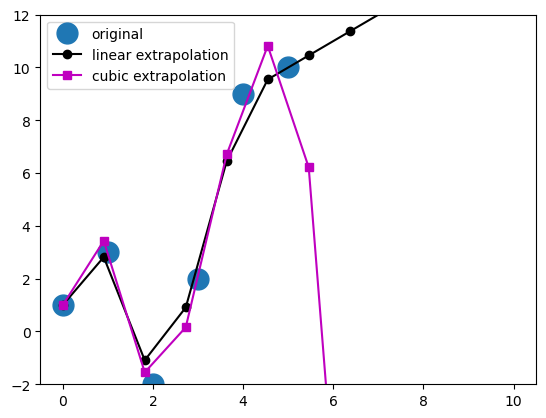

In [44]:
# extrapolation using scipy

extrapolationPoints = np.linspace(0, (len(signal)-1)*2, int(len(signal)*interpolationFactor))

interpolationFunctionLinear = interpolate.interp1d(originalPoints, signal, kind='linear', bounds_error=False, fill_value='extrapolate')
extrapolatedSignalLinear = interpolationFunctionLinear(extrapolationPoints)

interpolationFunctionCubic = interpolate.interp1d(originalPoints, signal, kind='cubic', bounds_error=False, fill_value='extrapolate')
extrapolatedSignalCubic = interpolationFunctionCubic(extrapolationPoints)

plt.plot(signal, 'o', markersize=15, label='original')
plt.plot(extrapolationPoints, extrapolatedSignalLinear, 'ko-', label='linear extrapolation')
plt.plot(extrapolationPoints, extrapolatedSignalCubic, 'ms-', label='cubic extrapolation')
plt.ylim([-2, 12])

plt.legend()
plt.show()

In [49]:
interpolationFunctionLinear = interpolate.interp1d(x_upSampled, y_upSampled)
xUpsampledRegular = np.linspace(x_upSampled[0], x_upSampled[-1], len(x_upSampled))
yUpsampledRegular = interpolationFunctionLinear(xUpsampledRegular)

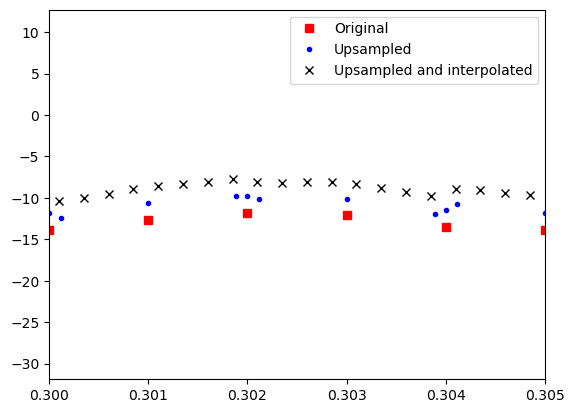

In [61]:
plt.plot(x, y, 'rs', label='Original')
plt.plot(x_upSampled, y_upSampled+2, 'b.', label='Upsampled')
plt.plot(xUpsampledRegular, yUpsampledRegular+4, 'kx', label='Upsampled and interpolated')

plt.legend()
plt.xlim([.3, .305])
plt.show()